In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
uploaded= files.upload()

Saving Mall_Customers (4).csv to Mall_Customers (4).csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import NearestNeighbors
import altair as alt
from tabulate import tabulate

In [ ]:
from google.colab import files
uploaded = files.upload()  # Upload your file

import pandas as pd

# Get the actual name of the uploaded file
uploaded_file_name = list(uploaded.keys())[0]

# Read the file using the correct name
df = pd.read_csv(uploaded_file_name)  # Use the actual file name

print(df.head())

Saving Mall_Customers (4).csv to Mall_Customers (4) (3).csv
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

Descriptive Statistics:
|       | CustomerID   | Age    | Annual Income (k$)   | Spending Score (1-100)   |
|:------|:-------------|:-------|:---------------------|:-------------------------|
| count | 200          | 200    | 200                  | 200                      |
| mean  | 100.5        | 38.85  | 60.56                | 50.2                     |
| std   | 57.8792      | 13.969 | 26.2647              | 25.8235                  |
| min   | 1            | 18     

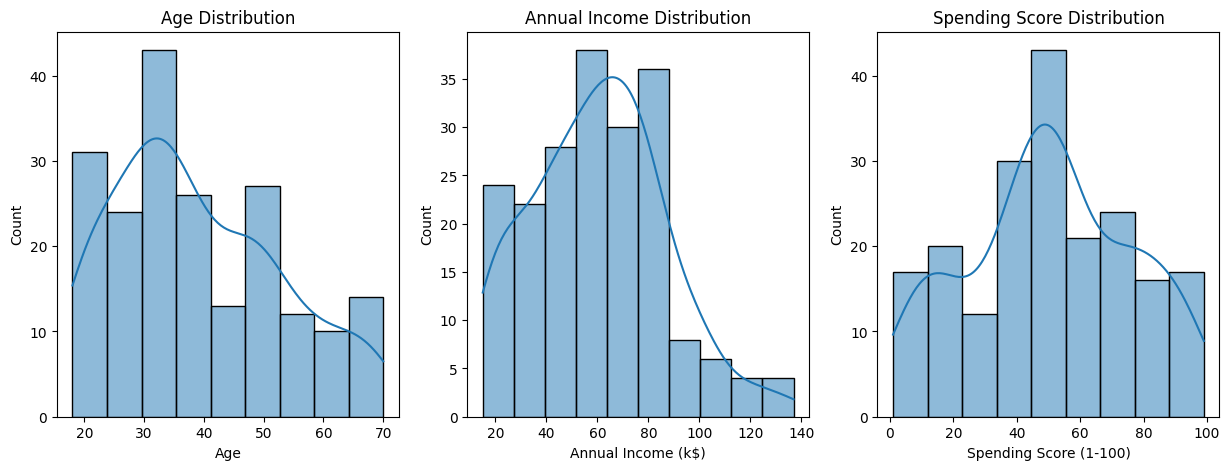

In [ ]:
print(df.info())

# Descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe().to_markdown(numalign="left", stralign="left"))

# Checking for missing values
print("\nMissing Values:")
print(df.isnull().sum().to_markdown(numalign="left", stralign="left"))

# Distributions of numeric variables
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
sns.histplot(df['Age'], kde=True, ax=axes[0])
axes[0].set_title('Age Distribution')
sns.histplot(df['Annual Income (k$)'], kde=True, ax=axes[1])
axes[1].set_title('Annual Income Distribution')
sns.histplot(df['Spending Score (1-100)'], kde=True, ax=axes[2])
axes[2].set_title('Spending Score Distribution')
plt.show()


Gender Distribution:
| Gender   | count   |
|:---------|:--------|
| Female   | 112     |
| Male     | 88      |


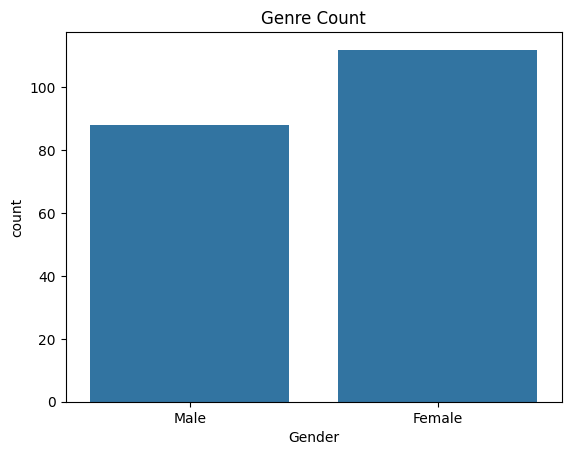


Descriptive Statistics by Gender:

Male:
|       | Age     | Annual Income (k$)   | Spending Score (1-100)   |
|:------|:--------|:---------------------|:-------------------------|
| count | 88      | 88                   | 88                       |
| mean  | 39.8068 | 62.2273              | 48.5114                  |
| std   | 15.5148 | 26.6384              | 27.8968                  |
| min   | 18      | 15                   | 1                        |
| 25%   | 27.75   | 45.5                 | 24.5                     |
| 50%   | 37      | 62.5                 | 50                       |
| 75%   | 50.5    | 78                   | 70                       |
| max   | 70      | 137                  | 97                       |

Female:
|       | Age     | Annual Income (k$)   | Spending Score (1-100)   |
|:------|:--------|:---------------------|:-------------------------|
| count | 112     | 112                  | 112                      |
| mean  | 38.0982 | 59.25              

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

In [ ]:
print("\nGender Distribution:")
print(df['Gender'].value_counts().to_markdown(numalign="left", stralign="left"))
sns.countplot(x='Gender', data=df)
plt.title('Genre Count')
plt.show()

# Descriptive statistics by gender
print("\nDescriptive Statistics by Gender:")
for gender in df['Gender'].unique():
    print(f"\n{gender}:")
    print(df[df['Gender'] == gender][['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].describe().to_markdown(numalign="left", stralign="left"))

print("\n")
# Spending Score distribution by gender
chart1 = alt.Chart(df).mark_bar().encode(
    x=alt.X('Spending Score (1-100):Q', bin=True),
    y=alt.Y('count()', title='Count'),
    column='Gender:N',
    tooltip=['Spending Score (1-100)', 'count()']
).properties(
    title='Spending Score Distribution by Gender'
).interactive()

chart1.save('spending_score_by_gender_bar_chart.json')
display(chart1)

print("\n")
# Annual Income distribution by gender
chart2 = alt.Chart(df).mark_bar().encode(
    x=alt.X('Annual Income (k$):Q', bin=True),
    y=alt.Y('count()', title='Count'),
    column='Gender:N',
    tooltip=['Annual Income (k$)', 'count()']
).properties(
    title='Annual Income Distribution by Gender'
).interactive()

chart2.save('annual_income_by_gender_bar_chart.json')
display(chart2)

print("\n")
# Age distribution by gender
chart3 = alt.Chart(df).mark_bar().encode(
    x=alt.X('Age:Q', bin=True),
    y=alt.Y('count()', title='Count'),
    column='Gender:N',
    tooltip=['Age', 'count()']
).properties(
    title='Age Distribution by Gender'
).interactive()

chart3.save('age_distribution_by_gender_bar_chart.json')
display(chart3)

In [ ]:
correlation_matrix = df[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']].corr(method='pearson') # Or df[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']].corr() if you just want the variables numeric

print("\nCorrelation Matrix (Pearson):")
print(correlation_matrix.to_markdown(numalign="left", stralign="left"))


Correlation Matrix (Pearson):
|                        | Annual Income (k$)   | Spending Score (1-100)   | Age       |
|:-----------------------|:---------------------|:-------------------------|:----------|
| Annual Income (k$)     | 1                    | 0.00990285               | -0.012398 |
| Spending Score (1-100) | 0.00990285           | 1                        | -0.327227 |
| Age                    | -0.012398            | -0.327227                | 1         |


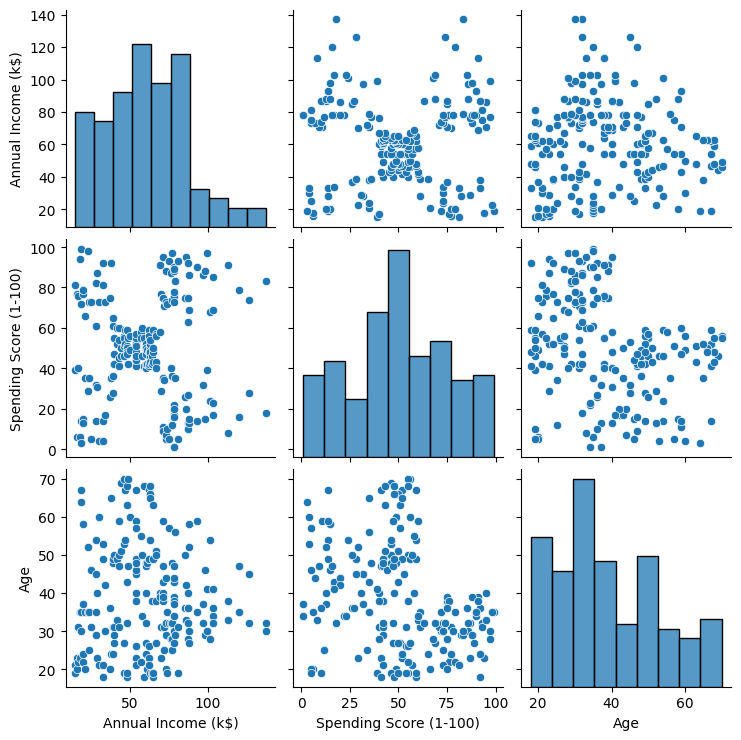

In [ ]:
sns.pairplot(df[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']])
plt.show()

In [ ]:
# Removed "CustomerID" column (irrelevant for clustering)
df.drop(columns=['CustomerID'], inplace=True)

# Coding of the "Gender" variable (transformation into numeric)
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

# Selection of characteristics for clustering (including "Gender")
features = df[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']]

# Data normalization
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
# Function to evaluate and visualize clusters
def evaluate_and_visualize_clusters(df, cluster_labels, algorithm_name, scaled_features):
    # Check for number of unique labels
    unique_labels = np.unique(cluster_labels)
    if len(unique_labels) == 1:
        print(f"\n{algorithm_name}: Only one cluster found. Skipping silhouette score and visualization.")
        return None, None  # Return None for silhouette and cluster labels

    # Calculate Silhouette Score
    silhouette_avg = silhouette_score(scaled_features, cluster_labels)
    print(f"\nSilhouette Score ({algorithm_name}): {silhouette_avg:.3f}")

    # Add cluster labels to DataFrame (DIRECTLY TO ORIGINAL df)
    df[f'Cluster_{algorithm_name}'] = cluster_labels

    # Dimensionality reduction for visualization (PCA)
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(scaled_features)
    df['PC1'] = pca_result[:, 0]
    df['PC2'] = pca_result[:, 1]

    # Visualization of clusters in 2D (using PCA)
    chart = alt.Chart(df).mark_circle().encode(
        x='PC1:Q',
        y='PC2:Q',
        color=f'Cluster_{algorithm_name}:N',
        shape='Gender:N',
        tooltip=['Annual Income (k$)', 'Spending Score (1-100)', 'Age', 'Gender', f'Cluster_{algorithm_name}']
    ).properties(
        title=f'Clusters de Clientes ({algorithm_name} com PCA)'
    ).interactive()

    chart.save(f'customer_clusters_{algorithm_name}_pca.json')
    chart.display()

    return silhouette_avg, cluster_labels

In [ ]:
kmeans_silhouette_scores = {}
kmeans_cluster_labels = {}
kmeans_models = {}
best_kmeans_model = None  # Initialize before the loop

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(scaled_features)
    silhouette_avg, cluster_labels = evaluate_and_visualize_clusters(df, kmeans.labels_, f'KMeans_{k}', scaled_features) # Pass df instead of df.copy()
    kmeans_silhouette_scores[k] = silhouette_avg
    kmeans_cluster_labels[k] = cluster_labels

    # Update best_kmeans_model if a better model is found
    if silhouette_avg is not None and (best_kmeans_model is None or silhouette_avg > silhouette_score(scaled_features, best_kmeans_model[1].labels_)):
        best_kmeans_model = (k, kmeans)




Silhouette Score (KMeans_2): 0.335


alt.Chart(...)


Silhouette Score (KMeans_3): 0.358


alt.Chart(...)


Silhouette Score (KMeans_4): 0.404


alt.Chart(...)


Silhouette Score (KMeans_5): 0.417


alt.Chart(...)


Silhouette Score (KMeans_6): 0.428


alt.Chart(...)


Silhouette Score (KMeans_7): 0.411


alt.Chart(...)


Silhouette Score (KMeans_8): 0.408


alt.Chart(...)


Silhouette Score (KMeans_9): 0.420


alt.Chart(...)


Silhouette Score (KMeans_10): 0.423


alt.Chart(...)

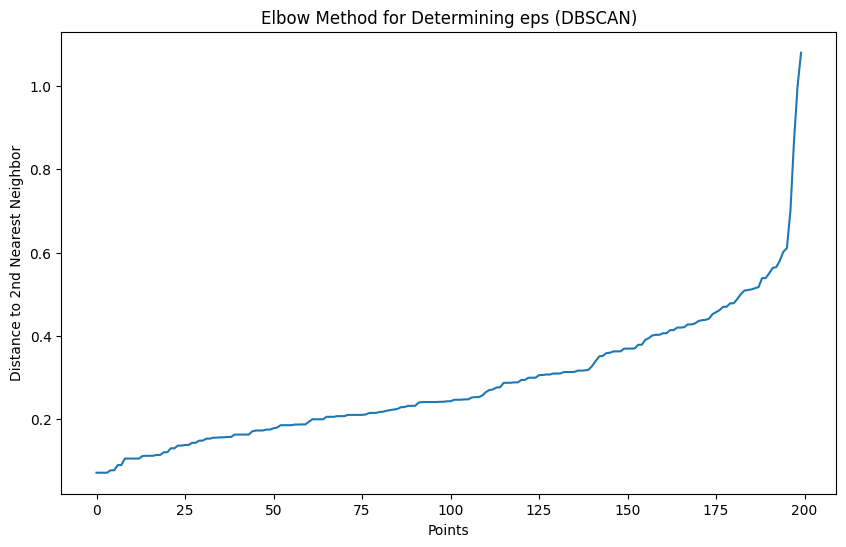

In [ ]:
# --- DBSCAN Clustering ---

dbscan_silhouette_score = None  # Initialize to None
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(scaled_features)
distances, indices = nbrs.kneighbors(scaled_features)
distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('Elbow Method for Determining eps (DBSCAN)')
plt.xlabel('Points')
plt.ylabel('Distance to 2nd Nearest Neighbor')
plt.show()

In [ ]:
eps = 0.5
dbscan = DBSCAN(eps=eps, min_samples=5)
dbscan.fit(scaled_features)

# Execute o DBSCAN e obtenha o silhouette score
dbscan = DBSCAN(eps=eps, min_samples=5)  # Adjust min_samples if necessary
dbscan.fit(scaled_features)
dbscan_silhouette_score, _ = evaluate_and_visualize_clusters(df.copy(), dbscan.labels_, 'DBSCAN', scaled_features)


Silhouette Score (DBSCAN): 0.185


alt.Chart(...)

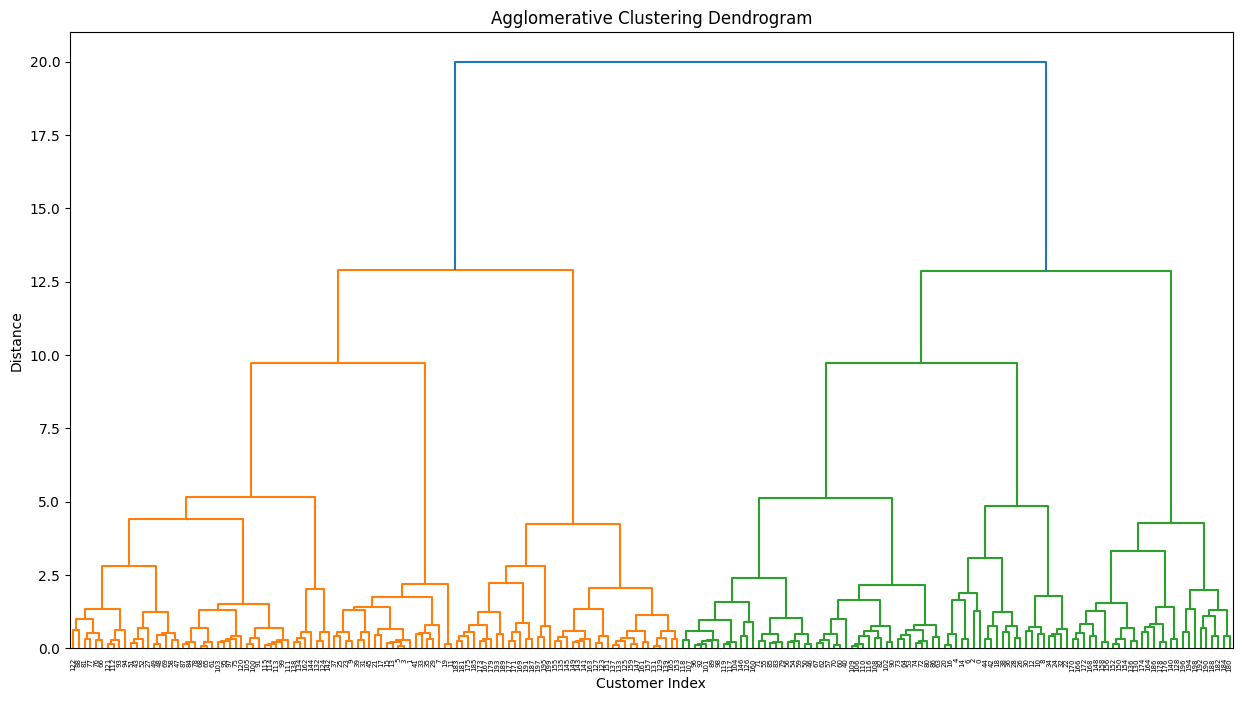

In [ ]:
# --- Agglomerative Clustering ---

agg_silhouette_score = None  # Initialize to None
linked = linkage(scaled_features, 'ward')

plt.figure(figsize=(15, 8))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Agglomerative Clustering Dendrogram')
plt.xlabel('Customer Index')
plt.ylabel('Distance')
plt.show()

In [ ]:
n_clusters = 5
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
agg_clustering.fit(scaled_features)

agg_silhouette_score, agg_cluster_labels = evaluate_and_visualize_clusters(df.copy(), agg_clustering.labels_, 'Agglomerative', scaled_features)


Silhouette Score (Agglomerative): 0.390


alt.Chart(...)

In [ ]:
# Gaussian Mixture Model (GMM) Clustering
n_components_range = range(1, 11)  # Define the range of components to test
bic_scores = []
gmm_models = {}
best_gmm_silhouette_score = None  # Initialize to None

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(scaled_features)
    bic_scores.append(gmm.bic(scaled_features))
    gmm_models[n_components] = gmm

    # Evaluate and visualize the clusters for each GMM model
    silhouette_avg, cluster_labels = evaluate_and_visualize_clusters(df.copy(), gmm.predict(scaled_features), f'GMM_{n_components}', scaled_features)

    # Update best_gmm_silhouette_score if a better model is found
    if silhouette_avg is not None and (best_gmm_silhouette_score is None or silhouette_avg > best_gmm_silhouette_score):
        best_gmm_silhouette_score = silhouette_avg
        best_gmm_model = (n_components, gmm)

# Filter GMM models with at least two clusters
filtered_gmm_models = {k: model for k, model in gmm_models.items() if
                      len(np.unique(model.predict(scaled_features))) > 1}

# Find the best GMM model
if filtered_gmm_models:
    best_gmm_model = max(filtered_gmm_models.items(),
                        key=lambda item: silhouette_score(scaled_features, item[1].predict(scaled_features)))
    optimal_n_components = best_gmm_model[0]


GMM_1: Only one cluster found. Skipping silhouette score and visualization.

Silhouette Score (GMM_2): 0.329


alt.Chart(...)


Silhouette Score (GMM_3): 0.335


alt.Chart(...)


Silhouette Score (GMM_4): 0.338


alt.Chart(...)


Silhouette Score (GMM_5): 0.406


alt.Chart(...)


Silhouette Score (GMM_6): 0.373


alt.Chart(...)


Silhouette Score (GMM_7): 0.343


alt.Chart(...)


Silhouette Score (GMM_8): 0.378


alt.Chart(...)


Silhouette Score (GMM_9): 0.346


alt.Chart(...)


Silhouette Score (GMM_10): 0.314


alt.Chart(...)

In [ ]:
# Comparison of all models to find the best (MODIFIED)
all_silhouette_scores = {
    'KMeans': kmeans_silhouette_scores[best_kmeans_model[0]] if best_kmeans_model else float('inf'), # Corrected access to Silhouette Score
    'DBSCAN': dbscan_silhouette_score if dbscan_silhouette_score is not None else -1,
    'Agglomerative': agg_silhouette_score,
    'GMM': best_gmm_silhouette_score if best_gmm_silhouette_score is not None else -1
}

# Finds the best model based on Silhouette Score (bigger is better)
best_algorithm = max(all_silhouette_scores, key=all_silhouette_scores.get)
best_silhouette = all_silhouette_scores[best_algorithm]

# Define the best model and its cluster labels
if best_algorithm == 'KMeans':
 best_model = best_kmeans_model
elif best_algorithm == 'DBSCAN':
 best_model = ('DBSCAN', dbscan) # Create a tuple similar to best_kmeans_model
elif best_algorithm == 'Agglomerative':
 best_model = ('Agglomerative', agg_clustering)
else: #GMM
 best_model = best_gmm_model

print(f"\nOverall Best Model: {best_algorithm}, Silhouette Score: {best_silhouette:.3f}")


Overall Best Model: KMeans, Silhouette Score: 0.428


In [ ]:
# --- Analysis and Discussion ---

print("\n## Analysis and Discussion ##\n")

# Discuss the characteristics of each algorithm
print("**K-Means:**")
if best_kmeans_model:
    print("- Assumes spherical clusters and equal variance.")
    print("- Sensitive to outliers and initialization.")
    print(f"- Best model found with {best_kmeans_model[0]} clusters and Silhouette Score of {kmeans_silhouette_scores[best_kmeans_model[0]]:.3f}.") # Accessing score correctly
else:
    print("- Did not find a good fit for this dataset.")

print("\n**DBSCAN:**")
if dbscan_silhouette_score is not None:
    print("- Good for clusters of varying density and arbitrary shapes.")
    print("- Can identify outliers.")
    print(f"- Achieved a Silhouette Score of {dbscan_silhouette_score:.3f} with eps={eps} and min_samples=5.")
else:
    print("- Did not find meaningful clusters or produced only one cluster.")

print("\n**Agglomerative Clustering:**")
print("- Offers flexibility in linkage methods (ward, single, complete, average).")
print("- Provides a hierarchy of clusters through the dendrogram.")
print(f"- Achieved a Silhouette Score of {agg_silhouette_score:.3f} with {n_clusters} clusters.")

print("\n**GMM:**")
if best_gmm_silhouette_score is not None:
    print("- Assumes data is generated by a mixture of Gaussian distributions.")
    print("- Can capture overlapping clusters.")
    print(f"- Best model found with {optimal_n_components} components and Silhouette Score of {best_gmm_silhouette_score:.3f}.")
else:
    print("- Did not find a good fit for this dataset.")

# Analyze the characteristics of each cluster in the best model
print("\n## Cluster Analysis ##\n")

if best_model:
    if best_algorithm == 'KMeans':
        best_k = best_model[0]
        best_cluster_labels = df[f'Cluster_KMeans_{best_k}']
    else:
        best_cluster_labels = df[f'Cluster_{best_algorithm}']

    for cluster in best_cluster_labels.unique():
        if cluster != -1:  # Exclude outliers (if any)
            print(f'\nCluster {cluster}:')
            cluster_data = df[best_cluster_labels == cluster][['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']]

            # Descriptive statistics table
            print(tabulate(cluster_data.describe(), headers='keys', tablefmt='psql', numalign="left", stralign="left"))

            # Additional analysis (example)
            gender_counts = cluster_data['Gender'].value_counts()
            most_common_gender = gender_counts.index[0]
            most_common_gender_percentage = (gender_counts[0] / gender_counts.sum()) * 100
            print(f"Gênero predominante: {most_common_gender} ({most_common_gender_percentage:.1f}%)")

            # Mean comparison between clusters
            cluster_mean_age = cluster_data['Age'].mean()
            cluster_mean_income = cluster_data['Annual Income (k$)'].mean()
            cluster_mean_spending = cluster_data['Spending Score (1-100)'].mean()

            print(f"Average Age: {cluster_mean_age:.2f}")
            print(f"Average Annual Income: {cluster_mean_income:.2f}")
            print(f"Average Spending Score: {cluster_mean_spending:.2f}")

            # Identify customer profiles (example)
            if cluster_mean_age < 30 and cluster_mean_spending > 70:
                print("Profile: Young Spenders")
            elif cluster_mean_age > 50 and cluster_mean_income > 80:
                print("Profile: Elderly People With High Purchasing Power")
            elif cluster_mean_income < 50 and cluster_mean_spending < 40:
                print("Profile: Low Income and Low Spending")
            elif cluster_mean_spending > 70 and cluster_mean_income > 80:
                print("Profile: High Purchasing Power and High Spending")
            else:
                print("Profile: Default Behavior")

else:
    print("No suitable model found for customer segmentation.")


## Analysis and Discussion ##

**K-Means:**
- Assumes spherical clusters and equal variance.
- Sensitive to outliers and initialization.
- Best model found with 6 clusters and Silhouette Score of 0.428.

**DBSCAN:**
- Good for clusters of varying density and arbitrary shapes.
- Can identify outliers.
- Achieved a Silhouette Score of 0.185 with eps=0.5 and min_samples=5.

**Agglomerative Clustering:**
- Offers flexibility in linkage methods (ward, single, complete, average).
- Provides a hierarchy of clusters through the dendrogram.
- Achieved a Silhouette Score of 0.390 with 5 clusters.

**GMM:**
- Assumes data is generated by a mixture of Gaussian distributions.
- Can capture overlapping clusters.
- Best model found with 5 components and Silhouette Score of 0.406.

## Cluster Analysis ##


Cluster 0:
+-------+---------+----------------------+--------------------------+----------+
|       | Age     | Annual Income (k$)   | Spending Score (1-100)   | Gender   |
|-------+---------+-----